In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('Datasets/coral_forecast.csv', skiprows=[1])

# Group data by site
# Sites are characterised by a unique (lon, lat) combination. To group sites together, 
# we can firstly create a new column with the combined longitude and latitude.
data['lon_lat'] = list(zip(data.longitude, data.latitude))

# We can now perform groupby operations, e.g. computing mean values across all models
data = data.groupby('lon_lat').mean().drop(columns='model')

# Display a summary
data

# Create a new column with the floored latitude (removing decimals)
data['latitude_grouped'] = np.floor(data['latitude']).astype(int)

# Group by the new latitude column and calculate the mean for coral cover columns
mean_coral_cover = data.groupby('latitude_grouped', as_index=False).mean()

#Melt data into coral_melted=o long format format for seaborn
mean_melt_coral=mean_coral_cover.melt(id_vars='latitude', value_vars=['coral_cover_2020','coral_cover_2100'], var_name='year', value_name='coral_cover')

# Create a new column with the floored latitude (removing decimals)
mean_melt_coral['latitude_grouped']= np.floor(mean_melt_coral['latitude']).astype(int)

#make year 2020 and 2100 category to use for hue
mean_melt_coral['year']=mean_melt_coral['year'].astype('category')

#create line plot with seaborn
custom_colors = ["#1f77b4", "#ff7f0e"]
dx =sns.lineplot(data=mean_melt_coral, x='latitude_grouped', y='coral_cover', hue= 'year', marker='none', palette=custom_colors)


#customize  the plot
plt.xlabel("Latitude")
plt.ylabel('Coral Cover (km^2)')
plt.title('Coral Cover as a Function of Latitude')
plt.grid(False)
plt.tight_layout()
handles, _ = dx.get_legend_handles_labels()
plt.legend(handles=handles, title='Year', labels=['Coral Cover in 2020', 'Coral Cover in 2100'])
sns.despine() # Remove top and right axis spines

#show plot
plt.show()


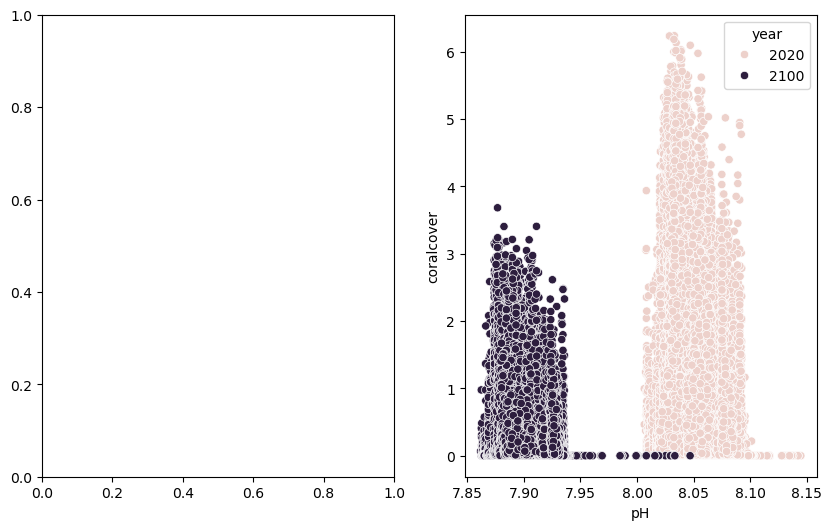

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('Datasets/coral_forecast.csv', skiprows=[1])

# Group data by site
# Sites are characterised by a unique (lon, lat) combination. To group sites together, 
# we can firstly create a new column with the combined longitude and latitude.
data['lon_lat'] = list(zip(data.longitude, data.latitude))

# We can now perform groupby operations, e.g. computing mean values across all models
data = data.groupby('lon_lat').mean().drop(columns='model')


# Display a summary
test = data.reset_index()
test.columns = test.columns.str.replace('_', '')
long = pd.wide_to_long(test, stubnames=['pH', 'coralcover'], i='lonlat', j='year')
long

 
#plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
ax1 = sns.scatterplot(data=long, x='pH',y='coralcover', hue= 'year')


# #Group by pH and calculate the mean coral cover
# mean_coral_cover = long.groupby('pH','year')['coralcover'].mean().reset_index()

# mean_coral_cover

# #Reshape using melt, melting around pH values
# data_melt_pH= pd.melt(data, id_vars=['coral_cover_2020','coral_cover_2100'], value_vars=['pH_2020','pH_2100'], var_name='year', value_name='pH')

# #Reshape again so that you can have two line for 2020 and 2100
# data_melt_pH_year=pd.melt(data_melt_pH, id_vars=['pH'], value_vars= ['coral_cover_2020', 'coral_cover_2100'], var_name='Year', value_name='Coral Cover')

# #
# temp=data.reset_index()
# test=pd.wide_to_long(temp, stubnames='pH', i='lon_lat', j='year' )
# test.head()

In [ ]:


#

# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
# ax1.scatter(data.pH_2020,data.coral_cover_2020, alpha=0.05, s=5)
# plt.show()

#Plot using sns.lineplot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_melt_pH_year, x='pH', y='Coral Cover', call='year')

#Edit plot display
plt.title('Coral Cover vs pH')
plt.xlabel('pH')
plt.ylabel('Coral Cover (%)')
plt.legend(title='Year')
plt.show()

In [ ]:
print('new cell')
